Importing all the necessary modules to perform linear regression.
Trial:1 we will proceed with linear regression for this dataset and check the goodness of fit as well as the error.
        To make it perfect we will further split the training set in the propotion of 70 - 30 and fit the model.
        Then we will fit for the entire dataset and compare it against the test data set.

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression , Ridge ,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [193]:
#importing the training data set
traindf1=pd.read_csv('train_BRC.csv')

In [194]:
#data preprocessing
#checking for null values
traindf1.info() #we can confirm that there is no null values in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [217]:
#Data is having lot of categorical type variables, hence we need to convert it into numerical
#label encoding 
category_col=['gender','area','qualification','income','num_policies','policy','type_of_policy']
for column in category_col:
    traindf1[column]=LabelEncoder().fit_transform(traindf1[column])
traindf1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,5790,1,0,1,64308
1,2,1,0,1,1,0,8,5080,1,0,1,515400
2,3,1,1,0,1,1,8,2599,1,0,1,64212
3,4,0,0,1,1,0,7,0,1,0,1,97920
4,5,1,1,1,3,1,6,3508,1,0,0,59736


In [218]:
#now we'll scale our data claim amount since it's the only variable in the data which is wide ranges
MMS = MinMaxScaler(feature_range=(0,1)) #will set the scaling range to 0 to 1.
traindf1['claim_amount']=MMS.fit_transform(traindf1[['claim_amount']])
traindf1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,0.181539,1,0,1,64308
1,2,1,0,1,1,0,8,0.159278,1,0,1,515400
2,3,1,1,0,1,1,8,0.081489,1,0,1,64212
3,4,0,0,1,1,0,7,0.000000,1,0,1,97920
4,5,1,1,1,3,1,6,0.109989,1,0,0,59736


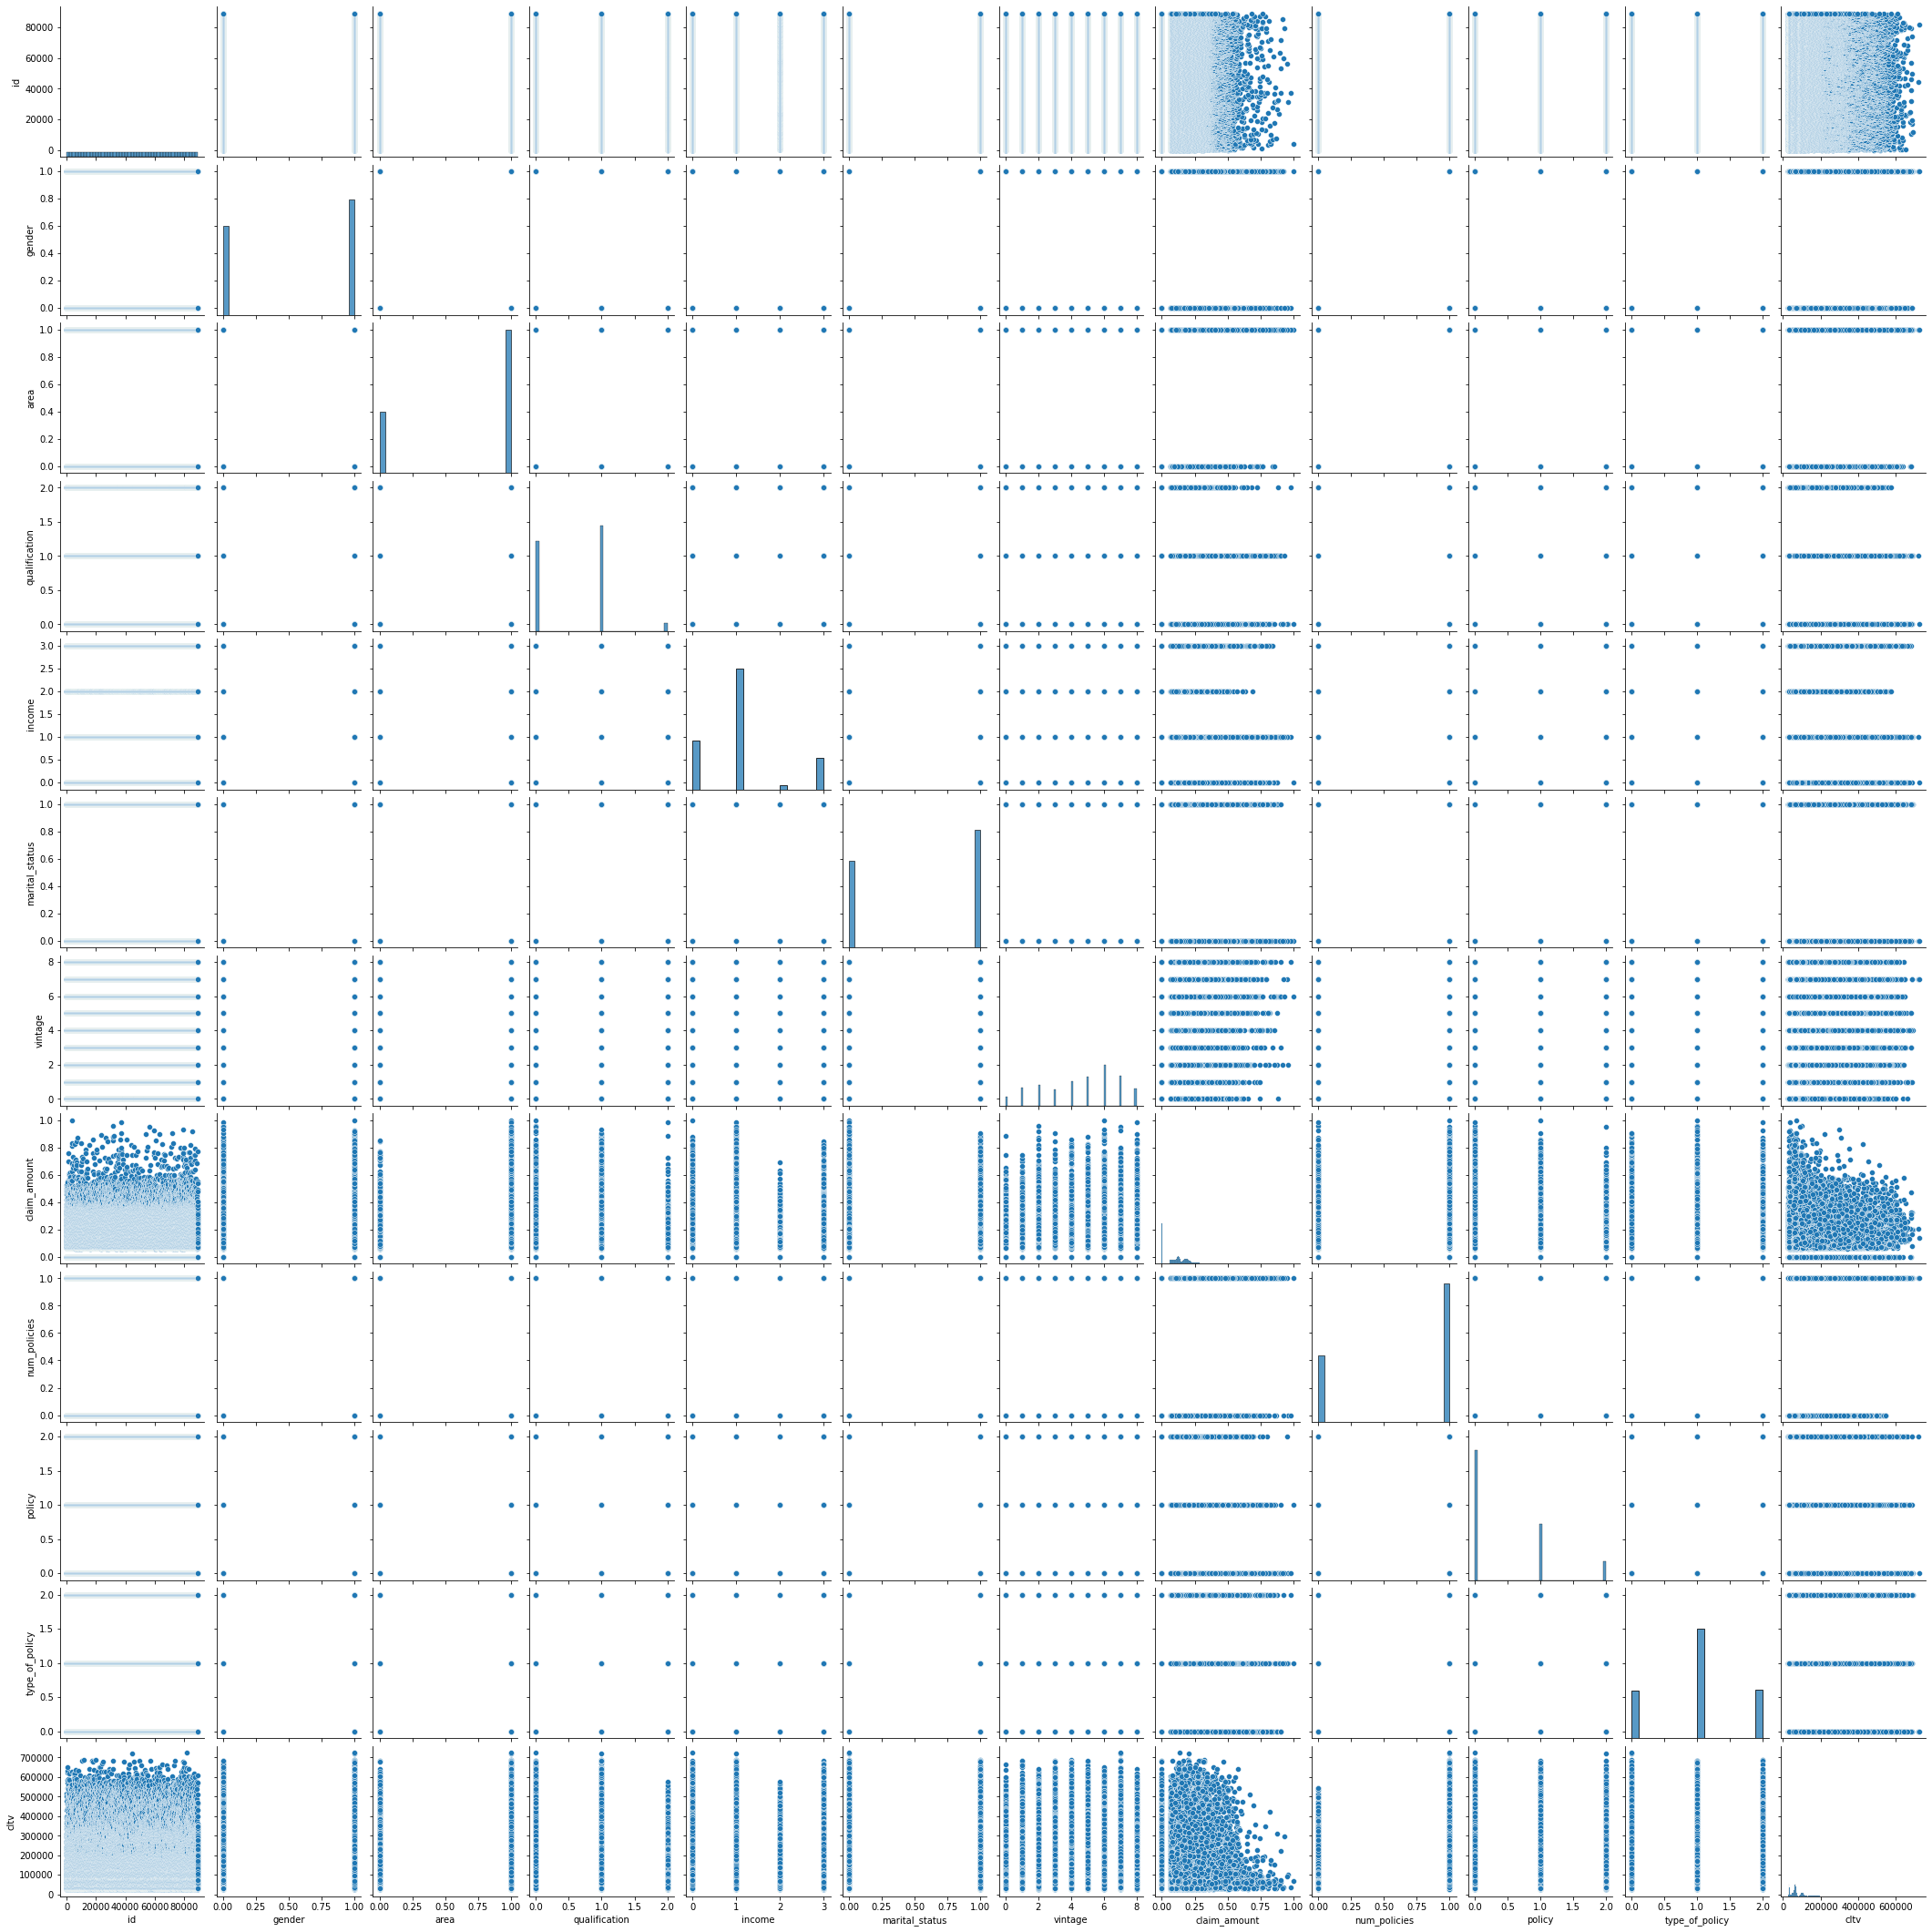

In [192]:
sns.pairplot(traindf1)


In [228]:
#assigning the independant and dependant variables to x and y respectively and further splitting our train dataset into 70:30 propotion to validate model
x=traindf1.drop(['id','gender','cltv','vintage','policy','type_of_policy','qualification'],axis=1)
y=traindf1['cltv']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)


In [220]:
#fitting model into the splitted training data 

lr=LinearRegression()  #creating an instance forlinear model
lr.fit(x_train,y_train) #fitting the data 

LinearRegression()

In [221]:
#using the fitted model to predict values for our test split as well as again our train split to MSE and r2
train_predict=lr.predict(x_train)
test_predict=lr.predict(x_test)

In [222]:
#training data prediction scores
print("****training data prediction********")
print("MSE :", mean_squared_error(y_train,train_predict))
print("R2 score :", r2_score(y_train,train_predict))

****training data prediction********
MSE : 6950260082.327376
R2 score : 0.14921633815250335


In [223]:
#test data prediction scores
print("****test data prediction********")
print("MSE :", mean_squared_error(y_test,test_predict))
print("R2 score :", r2_score(y_test,test_predict))

****test data prediction********
MSE : 7078205278.55326
R2 score : 0.14797983542337445


In [168]:
print("co-eff and intercept 1:",lr.coef_,lr.intercept_)

co-eff and intercept 1: [ 8084.39244998 -1622.61427734 -1930.50794656 -6248.01922229
 92062.77116475 64581.14560561   976.7391259  -1465.76277666] 43937.26762465911


In [229]:
#using ridge and lasso to compare the r2 scores
ridge=Ridge(alpha=1.0)
lasso=Lasso(alpha=1.0)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso()

In [230]:
ridge_pte=ridge.predict(x_test)
ridge_ptr=ridge.predict(x_train)
lasso_pte=lasso.predict(x_test)
lasso_ptr=lasso.predict(x_train)

In [231]:
print("**********training data prediction for ridge and lasso*****************")
print("MSE for ridge", mean_squared_error(y_train, ridge_ptr))
print("MSE for lasso", mean_squared_error(y_train, lasso_ptr))
print("R2 for ridge", r2_score(y_train, ridge_ptr))
print("R2 for lasso", r2_score(y_train, lasso_ptr))

**********training data prediction for ridge and lasso*****************
MSE for ridge 7008486149.826705
MSE for lasso 7008486020.891129
R2 for ridge 0.1463657246023219
R2 for lasso 0.14636574030668725


In [232]:
print("**********test data prediction for ridge and lasso*****************")
print("MSE for ridge", mean_squared_error(y_test, ridge_pte))
print("MSE for lasso", mean_squared_error(y_test, lasso_pte))
print("R2 for ridge", r2_score(y_test, ridge_pte))
print("R2 for lasso", r2_score(y_test, lasso_pte))

**********test data prediction for ridge and lasso*****************
MSE for ridge 6943017644.32408
MSE for lasso 6943003981.306574
R2 for ridge 0.1545183418872571
R2 for lasso 0.1545200056927215


As concluded from ridge , lasso and linear regression models, the r2 values is not varying significantly between the models.
 we are good to go with any of those given models.
Choosing lasso since the r2 score is greater than splitted test dataset. 

In [234]:
pickle.dump(lasso,open('my_model_lassoregression.sav',"wb")) #dumping and storing our model in .sav format

In [257]:
myregressionmodel=pickle.load(open("my_model_lassoregression.sav","rb")) #calling our model .sav file as a new model parameter

Now the pre-processing must be done to the testing data set too in order to pass the parameters to our built dataset which is bsaed on only 5 variables.

In [258]:
testdf=pd.read_csv('test_koRSKBP.csv') #importing the given csv test file\

#categorizing variables which is in object format 
category_col=['gender','area','qualification','income','num_policies','policy','type_of_policy'] 
for column in category_col:
    testdf[column]=LabelEncoder().fit_transform(testdf[column])
    
#scaling the column claim amount in a way that it fits into the range of 0 to 1

MMS = MinMaxScaler(feature_range=(0,1)) #will set the scaling range to 0 to 1.
testdf['claim_amount']=MMS.fit_transform(testdf[['claim_amount']])
x_pred_test=testdf.drop(['id','gender','vintage','policy','type_of_policy','qualification'],axis=1) 
x_pred_test

,area,income,marital_status,claim_amount,num_policies
0,0,1,0,0.065593,1
1,1,0,0,0.126083,1
2,0,1,1,0.089906,1
3,0,3,1,0.000000,1
4,1,0,0,0.432133,1
...,...,...,...,...,...
59590,0,1,1,0.000000,0
59591,1,1,0,0.000000,0
59592,1,0,1,0.102139,1
59593,0,1,0,0.088707,1


In [261]:
cltv=myregressionmodel.predict(x_pred_test)
testdf['cltv']=cltv
testdf

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,89393,0,0,1,1,0,6,0.065593,1,1,2,110664.969765
1,89394,0,1,1,0,0,4,0.126083,1,0,1,126424.392541
2,89395,1,0,1,1,1,7,0.089906,1,1,0,106162.309447
3,89396,0,0,0,3,1,2,0.000000,1,1,2,94130.166488
4,89397,0,1,1,0,0,5,0.432133,1,1,2,153232.315626
...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,1,0,0,1,1,6,0.000000,0,0,2,33902.493905
59591,148984,1,1,1,1,0,6,0.000000,0,2,0,48917.177010
59592,148985,0,1,1,0,1,4,0.102139,1,1,1,117694.712113
59593,148986,1,0,0,1,0,1,0.088707,1,0,2,112689.631627


In [263]:
sample_submission=testdf[['id','cltv']] # creating a sample dataframe with only the predicted values and respective customer id.
sample_submission.to_csv("Mogith_sample_submission.csv",index=False) #storing the file locally as CSV.